In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('voting_eligibility_dataset.csv')

df.head()


,Nationality,Age,Status,Eligible_for_Voting
0,Indian,85,alive,Yes
1,Indian,67,dead,No
2,Indian,19,alive,Yes
3,Indian,38,alive,Yes
4,British,42,alive,No


In [3]:
df["Nationality"] = df["Nationality"].apply(lambda x: 1 if x == "Indian" else 0)
df["Status"] = df["Status"].apply(lambda x: 1 if x == "alive" else 0)
df["Eligible_for_Voting"] = df["Eligible_for_Voting"].apply(lambda x: 1 if x == "Yes" else 0)

In [4]:
df.head()

,Nationality,Age,Status,Eligible_for_Voting
0,1,85,1,1
1,1,67,0,0
2,1,19,1,1
3,1,38,1,1
4,0,42,1,0


In [5]:
# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4) 

# The remaining 25% is used for testing  it drops the training data
# from the original dataframe
test_df = df.drop(train_df.index)

In [6]:
# now let's separate the targets and labels
x_train = train_df.drop('Eligible_for_Voting', axis=1)
y_train = train_df['Eligible_for_Voting']
x_test = test_df.drop('Eligible_for_Voting', axis=1)
y_test = test_df['Eligible_for_Voting']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable 
# to save it.
input_shape = [x_train.shape[1]]

input_shape

[3]

In [7]:
# Create Model Neural Network, creating a lineaar model
import tensorflow as tf
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1, input_shape=input_shape)])

model.summary()


c:\Users\mural\OneDrive\Desktop\internship\tensorflowproj\tf_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Creating a Multiple Layer Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
] )

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = 'mae')

In [10]:
# There are optimization methods that you can use such as early stopping that will automatically stop the training when the model starts overfitting,
model.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test),
          batch_size=32,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3765 - val_loss: 0.2800
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2967 - val_loss: 0.2800
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2967 - val_loss: 0.2800
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2967 - val_loss: 0.2800
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2967 - val_loss: 0.2800


In [11]:
model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.0000000e+00],
       [2.4489392e-26],
       [1.3697465e-36],
       [2.8944145e-37],
       [0.0000000e+00],
       [2.3724392e-22],
       [2.6456911e-35],
       [0.0000000e+00],
       [5.1755358e-17],
       [0.0000000e+00],
       [1.1589264e-25],
       [2.5958284e-14],
       [1.8805901e-20],
       [0.0000000e+00],
       [0.0000000e+00],
       [3.2511569e-33],
       [5.1748778e-27],
       [0.0000000e+00],
       [0.0000000e+00],
       [3.3622841e-10],
       [0.0000000e+00],
       [0.0000000e+00],
       [5.2749414e-38],
       [0.0000000e+00],
       [0.0000000e+00],
       [4.1020170e-25],
       [0.0000000e+00],
       [5.2749414e-38],
       [0.0000000e+00],
       [1.5797011e-26],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.7220515e-11],
       [4.8826976e-29],
       [5.6311380e-19],
       [0.0000000e+00],
       [1.7282095e-28],
       [0.0000000e+00],
       [7.4747658e-36],
       [0.0000000e+00],
       [3.9733580e-31],
       [0.000000

In [12]:
y_test

0      1
3      1
9      0
21     0
22     1
      ..
381    0
385    1
391    0
395    0
398    1
Name: Eligible_for_Voting, Length: 100, dtype: int64

<Axes: >

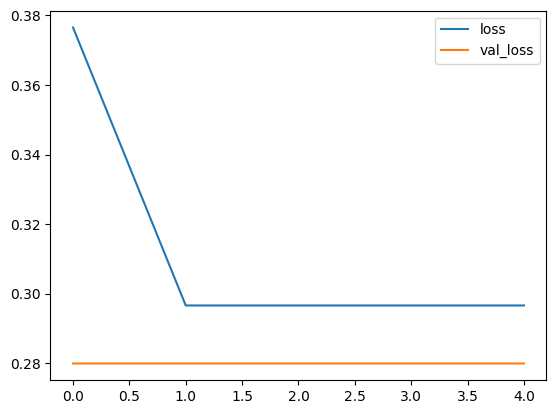

In [13]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()